## ODEs - Basic Methods 2.1

**BASEBALL PROGRAM**

In [23]:
import numpy as np
import matplotlib.pyplot as plt

Attempt 2: (adapted from soln)

Max range is 123.461 meters
Time of flight is 5.800 seconds


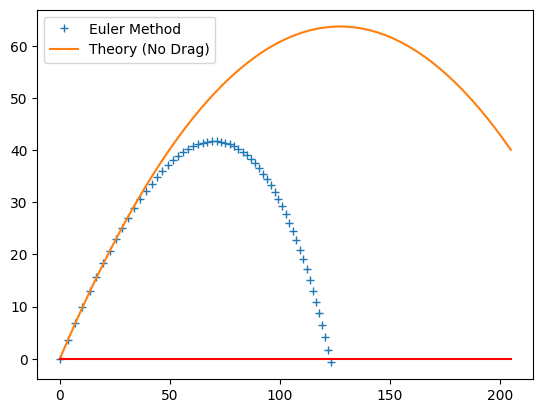

In [28]:
mass = 0.145
cd = 0.35
grav = 9.81
theta = np.deg2rad(45)
A = 0.074**2 * np.pi/4
rho = 1.225

r0 = np.array([0,0])
speed = 50 
theta = 45 
v0 = np.array([speed * np.cos(np.deg2rad(theta)), speed * np.sin(np.deg2rad(theta))])
r = np.copy(r0) # set intial position
v = np.copy(v0) # set initial velocity 
air_const = -0.5*rho*cd*A / mass


tau = 0.1
maxstep = 1000
xplot = np.empty(maxstep); yplot = np.empty(maxstep)
xNoAir = np.empty(maxstep); yNoAir = np.empty(maxstep)


for istep in range(maxstep):

    # Record position for plotting
    xplot[istep] = r[0]
    yplot[istep] = r[1]
    t = istep * tau
    xNoAir[istep] = r0[0] + v0[0]*t
    yNoAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2

    # Calc acceleration of ball
    accel = air_const * np.linalg.norm(v) * v # Air resistance
    accel[1] = accel[1] - grav                # Gravity

    # Calc new position and velo using Euler 
    r = r + tau*v 
    v = v + tau*accel

    # Break condition 
    if r[1] < 0:
        laststep = istep + 1
        xplot[laststep] = r[0]  # record last values computed 
        yplot[laststep] = r[1]
        t = laststep * tau
        xNoAir[laststep] = r0[0] + v0[0]*t
        yNoAir[laststep] = r0[1] + v0[1]*t - 0.5 * grav * t**2
        break

print(f'Max range is {xplot[laststep]:.3f} meters')
print(f'Time of flight is {laststep*tau:.3f} seconds')

# mark location of ground w straight line 
plt.plot(xplot[0:laststep+1], yplot[0:laststep+1], '+')
plt.plot(xNoAir[0:laststep+1], yNoAir[0:laststep+1], '-')
plt.plot(xNoAir[0:laststep+1], np.zeros(len(xNoAir[0:laststep+1])), 'r-')
plt.legend(['Euler Method', 'Theory (No Drag)'])
plt.show()

Flight time and range is a slight over estimate as last point is after the ground. Use interpolation between last 3 points to find value at zero.

In [ ]:
xvals = xplot[laststep-2:laststep+1]
yvals = yplot[laststep-2:laststep+1]

coeffs_range = np.polyfit(xvals, yvals, 2)

roots = np.roots(coeffs)
roots

array([123.07688927,  55.89868027])

In [70]:
range = [r for r in roots if xvals.min() <= r <= xvals.max()]
print(f'Interpolated range is {range[0]:.3f} metres')

Interpolated range is 123.077 metres


In [78]:
times = np.array([laststep-2, laststep-1, laststep]) * tau
times

array([5.6, 5.7, 5.8])

In [80]:
ranges = xplot[laststep-2:laststep+1]
ranges

array([120.78094875, 122.13270534, 123.46092163])

In [91]:
time_poly = np.polyfit(ranges, times, 2)
p_t = np.poly1d(time_poly)
adjusted_t = p_t(123.077)


In [92]:
print(f'Interpolated range is {range[0]:.3f} metres')
print(f'Interpolated times is {adjusted_t:.3f} seconds')

Interpolated range is 123.077 metres
Interpolated times is 5.771 seconds
